<center> <h2> Give Me Some Credit Kaggle Competition </h2> </center>


In [1]:
# Main tools we used:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Models:
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Python utilities:
import time
import os


# Data Exploration

In [2]:
df = pd.read_csv('cs-training.csv')

In [3]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
df.describe(include='all')

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df.SeriousDlqin2yrs.mean()

0.06684

Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

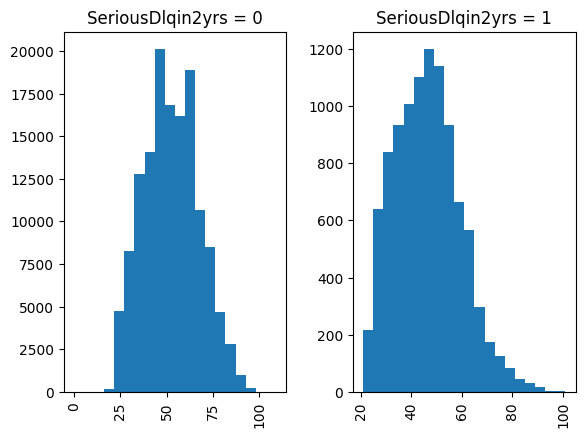

In [8]:
age_hist = df['age'].hist(by=df['SeriousDlqin2yrs'], bins=20)
age_hist[0].set_title('SeriousDlqin2yrs = 0')
age_hist[1].set_title('SeriousDlqin2yrs = 1')

In [9]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [11]:
df.DebtRatio.quantile(0.975)

3489.024999999994

In [12]:
df[df['DebtRatio']>3489.025][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [14]:
df['MonthlyIncome_rounded'] = df['MonthlyIncome'].round(2)

In [16]:
df['MonthlyIncome_rounded'].mean()

6670.221237392844

In [18]:
df[(df['DebtRatio']>3489.025) & (df['MonthlyIncome'] == df['SeriousDlqin2yrs'])].shape[0]

164

In [19]:
df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'MonthlyIncome_rounded'],
      dtype='object')

In [21]:
df[df['NumberOfTimes90DaysLate']>95][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,5.739667
std,0.498764,0.270628,0.270628,26.019024
min,0.000000,96.000000,96.000000,0.000000
25%,0.000000,98.000000,98.000000,0.000000
50%,1.000000,98.000000,98.000000,0.000000
75%,1.000000,98.000000,98.000000,0.000000
max,1.000000,98.000000,98.000000,255.000000


In [22]:
df[df['RevolvingUtilizationOfUnsecuredLines']>0.9].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_rounded
count,20069.000000,20069.000000,20069.000000,20069.000000,20069.000000,20069.000000,15835.00000,20069.000000,20069.000000,20069.000000,20069.000000,19497.000000,15835.00000
mean,74274.335393,0.223529,43.806465,45.303752,1.855150,278.866636,5137.65911,4.999003,1.707609,0.654392,1.521949,0.823614,5137.65911
std,43371.591033,0.416620,681.614539,14.060166,11.251749,1144.915643,6438.33385,4.267246,11.264692,0.974891,11.256995,1.162840,6438.33385
min,2.000000,0.000000,0.900005,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,36290.000000,0.000000,0.980604,34.000000,0.000000,0.120297,2500.00000,2.000000,0.000000,0.000000,0.000000,0.000000,2500.00000
50%,73862.000000,0.000000,1.000000,44.000000,0.000000,0.340580,4000.00000,4.000000,0.000000,0.000000,0.000000,0.000000,4000.00000
75%,111756.000000,0.000000,1.000000,55.000000,1.000000,0.833733,6260.50000,7.000000,0.000000,1.000000,0.000000,1.000000,6260.50000
max,149994.000000,1.000000,50708.000000,103.000000,98.000000,61907.000000,440000.00000,53.000000,98.000000,25.000000,98.000000,13.000000,440000.00000


In [23]:
df[df['RevolvingUtilizationOfUnsecuredLines']>4].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_rounded
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,187.000000,264.000000,264.000000,264.000000,264.000000,249.000000,187.000000
mean,77532.174242,0.087121,3253.994058,49.825758,0.223485,597.261913,8445.090909,5.848485,0.090909,1.178030,0.106061,0.662651,8445.090909
std,41105.917333,0.282548,4996.840786,14.680629,0.646177,1762.773525,6667.375266,3.220620,0.584392,1.111011,0.561876,1.019295,6667.375266
min,294.000000,0.000000,4.074627,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43003.500000,0.000000,638.000000,38.000000,0.000000,0.219054,4255.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4255.000000
50%,81081.000000,0.000000,1823.000000,47.000000,0.000000,0.420447,7000.000000,5.000000,0.000000,1.000000,0.000000,0.000000,7000.000000
75%,113292.000000,0.000000,3834.500000,60.000000,0.000000,108.250000,10304.000000,7.000000,0.000000,2.000000,0.000000,1.000000,10304.000000
max,149280.000000,1.000000,50708.000000,87.000000,4.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000,44472.000000


In [24]:
df[df['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_rounded
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000,173.00000
mean,77655.004149,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596,8467.67052
std,41010.846073,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659,6564.06825
min,294.000000,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,44564.000000,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000,4500.00000
50%,80200.000000,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000,7000.00000
75%,111663.000000,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000,10091.00000
max,149280.000000,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000,44472.00000
